In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind

In [7]:
ruta_archivo = r'D:\cosas importantes\the_drige\EDA\entradas_validas\df_entradas_util.parquet'
df_todos = pd.read_parquet(ruta_archivo)
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316777 entries, CO20160101002327 to ES20240101005308
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   deposito      316763 non-null  object        
 1   tipoVehiculo  316763 non-null  object        
 2   motivo        316763 non-null  float64       
 3   turno         316763 non-null  object        
 4   Fecha_e       316763 non-null  datetime64[ns]
 5   FinDeSema     316777 non-null  bool          
 6   Festivo       316777 non-null  object        
 7   Hora_e        316763 non-null  object        
 8   grua          315330 non-null  object        
 9   tipoVia       316763 non-null  object        
 10  via           316763 non-null  object        
 11  numero        294259 non-null  object        
 12  cp            304594 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(10)
memory usage: 31.7+ MB


In [6]:
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316777 entries, CO20160101002327 to ES20240101005308
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   deposito      316763 non-null  object        
 1   tipoVehiculo  316763 non-null  object        
 2   motivo        316763 non-null  float64       
 3   turno         316763 non-null  object        
 4   Fecha_e       316763 non-null  datetime64[ns]
 5   FinDeSema     316777 non-null  bool          
 6   Festivo       316777 non-null  object        
 7   Hora_e        316763 non-null  object        
 8   grua          315330 non-null  object        
 9   tipoVia       316763 non-null  object        
 10  via           316763 non-null  object        
 11  numero        294259 non-null  object        
 12  cp            304594 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(10)
memory usage: 31.7+ MB


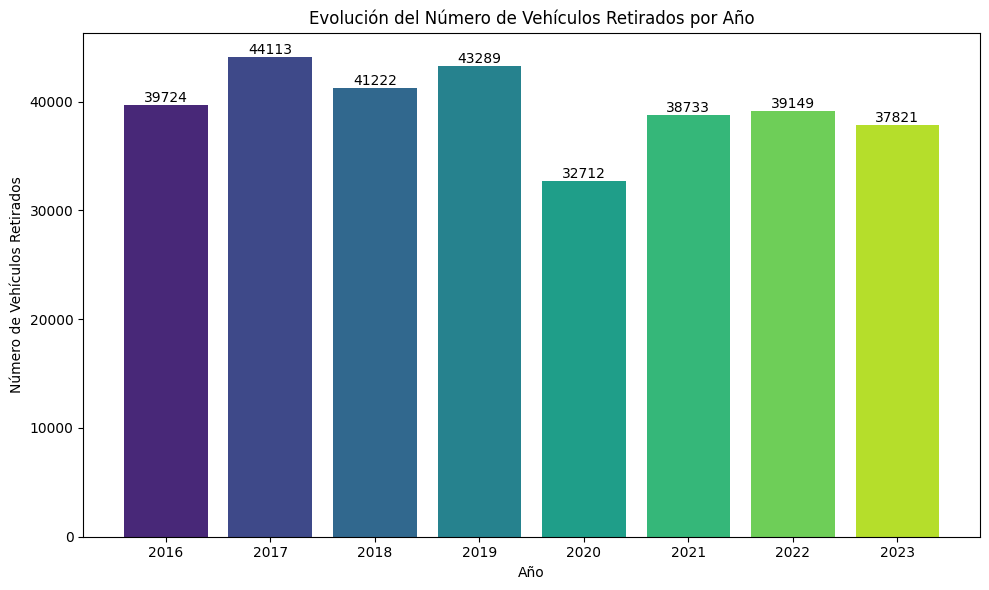

In [15]:
df_agrupado = df_todos.groupby(df_todos['Fecha_e'].dt.year).size().reset_index(name='Cantidad')
colores = sns.color_palette("viridis", len(df_agrupado))
plt.figure(figsize=(10, 6))
bars = plt.bar(df_agrupado['Fecha_e'], df_agrupado['Cantidad'], color=colores)
plt.xlabel('Año')
plt.ylabel('Número de Vehículos Retirados')
plt.title('Evolución del Número de Vehículos Retirados por Año')
for bar, cantidad in zip(bars, df_agrupado['Cantidad']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(cantidad),
             ha='center', va='bottom')
plt.grid(False)
plt.xticks(df_agrupado['Fecha_e'])
plt.tight_layout()
plt.show()

In [20]:
vehiculos_2020 = df_agrupado[df_agrupado['Fecha_e'] == 2020].iloc[0]['Fecha_e']
otros_años = df_agrupado[df_agrupado['Fecha_e'] != 2020]['Fecha_e']
promedio_otros_años = otros_años.mean()
t_stat, p_value = ttest_ind([vehiculos_2020], otros_años)
print("Prueba t de Student:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("La diferencia en la cantidad de vehículos retirados en 2020 es estadísticamente significativa en comparación con los otros años.")
else:
    print("La diferencia en la cantidad de vehículos retirados en 2020 no es estadísticamente significativa en comparación con los otros años.")

Prueba t de Student:
T-statistic: 0.20272121351988034
P-value: 0.8460525238666186
La diferencia en la cantidad de vehículos retirados en 2020 no es estadísticamente significativa en comparación con los otros años.
